<a href="https://colab.research.google.com/github/vinismachadoo/alura-imersao-dados-2/blob/main/microdados_enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. INTRODUÇÃO

Em 1998 era criado o Exame Nacional do Ensino Médio (Enem) com a finalidade de avaliar o desempenho dos estudantes de escolas públicas e particulares do Ensino Médio. Desde 2009, no entanto, o Enem assumiu mais uma função: ser a porta de entrada dos estudantes nas instituições federais de ensino superior, assim como para programas do Governo Federal como o Sistema de Seleção Unificado (Sisu), Programa Universidade para Todos (Prouni) e Financiamento Estudantil (Fies).

Milhões de estudantes em todo o país realizam o exame aplicado entre outubro e novembro em dois domingos consecutivos. No primeiro dia, são realizadas as provas de linguagens e códigos e de ciências humanas, além de uma redação. No segundo, o candidato testa seus conhecimentos em matemática e ciências da natureza. A prova, bastante temida entre os alunos, ocorre anualmente e requer quase um ano de preparação pra reunir todo o conteúdo do ensino médio.

Os microdados mais recentes do exame - a base de dados com todas as informações respondidas pelo candidato desde o momento da inscrição até o resultado - que estão disponíveis ao público no site do INEP são da edição realizada em 2019, que contou com mais de 5 milhões de inscrições de todo o país.

#2. BIBLIOTECAS E CONFIGURAÇÕES

In [ ]:
!pip install geopandas -q

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 13.4MB/s 
     |████████████████████████████████| 14.8MB 253kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import geopandas as gpd
from tqdm import tqdm

import sys
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=200
pd.options.display.max_columns=200

#3. BASE DE DADOS

O dataset que será explorado neste notebook pode ser encontrado [aqui](https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv). Para esta análise, o time da Alura selecionou uma amostra aleatória de 127,380 inscritos de forma a representar a população. É possível entender melhor a amostragem neste [link](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/filtrarDados). Foram mantidas todas as 136 colunas do dataset original e a descrição de cada coluna, assim como suas categorias possíveis de resposta, neste [dicionário](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/DICION%C3%81RIO).

In [ ]:
!wget 'http://download.inep.gov.br/microdados/microdados_enem_2019.zip'
!unzip microdados_enem_2019.zip

--2020-10-27 19:25:26--  http://download.inep.gov.br/microdados/microdados_enem_2019.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 665939887 (635M) [application/zip]
Saving to: ‘microdados_enem_2019.zip’

microdados_enem_201 100%[===================>] 635.09M   386KB/s    in 37m 57s 

2020-10-27 20:03:24 (286 KB/s) - ‘microdados_enem_2019.zip’ saved [665939887/665939887]

Archive:  microdados_enem_2019.zip
   creating: LEIA-ME E DOCUMENTOS TÉCNICOS/
  inflating: LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf  
  inflating: LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf  
  inflating: LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf  
  inflating: LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf  
   creating: PROVAS E GABARITOS/
  inflating: PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DI

In [ ]:
mantem_colunas = ['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA', 
                  'CO_UF_RESIDENCIA','SG_UF_RESIDENCIA',
                  'NU_IDADE','TP_SEXO','TP_COR_RACA',
                  'IN_TREINEIRO','IN_BAIXA_VISAO','IN_CEGUEIRA',
                  'IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA',
                  'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO',
                  'IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO','IN_VISAO_MONOCULAR',
                  'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA',
                  'CO_UF_PROVA','SG_UF_PROVA',
                  'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
                  'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT',
                  'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                  'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT',
                  'TP_STATUS_REDACAO','NU_NOTA_REDACAO',
                  'Q001','Q002','Q006','Q010',
                  'Q011','Q024','Q025']

enem = pd.read_csv('DADOS/MICRODADOS_ENEM_2019.csv', encoding='latin-1', sep=';', usecols=mantem_colunas)

In [ ]:
enem.shape

(5095270, 49)

In [ ]:
enem.describe()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
count,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,3.710433e+06,3.923145e+06,3.923145e+06,3.710433e+06,3.923144e+06,3.923144e+06
mean,3.086472e+06,3.071407e+01,2.208743e+01,2.128251e+00,1.210275e-01,1.217011e-03,1.403262e-04,3.185307e-04,4.323618e-04,9.224241e-06,1.468421e-03,4.411935e-04,1.636420e-03,3.132317e-04,7.497149e-05,2.362976e-04,2.176528e-04,3.088261e+06,3.073306e+01,7.289618e-01,7.715566e-01,7.715566e-01,7.289618e-01,4.778241e+02,5.072487e+02,5.205177e+02,5.231241e+02,1.139622e+00,5.711883e+02
std,9.973604e+05,9.943231e+00,7.454970e+00,1.017512e+00,3.261593e-01,3.486445e-02,1.184511e-02,1.784459e-02,2.078882e-02,3.037130e-03,3.829184e-02,2.099997e-02,4.041958e-02,1.769558e-02,8.658284e-03,1.537016e-02,1.475146e-02,9.977580e+05,9.947316e+00,4.453393e-01,4.217291e-01,4.217291e-01,4.453393e-01,7.609774e+01,8.241163e+01,6.415065e+01,1.090637e+02,7.851200e-01,1.887633e+02
min,1.100015e+06,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100015e+06,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.405108e+06,2.400000e+01,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.408003e+06,2.400000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.178000e+02,4.479000e+02,4.835000e+02,4.351000e+02,1.000000e+00,4.800000e+02
50%,3.124203e+06,3.100000e+01,1.900000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125101e+06,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.703000e+02,5.106000e+02,5.262000e+02,5.011000e+02,1.000000e+00,5.800000e+02
75%,3.549904e+06,3.500000e+01,2.400000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.549805e+06,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.332000e+02,5.666000e+02,5.653000e+02,5.978000e+02,1.000000e+00,6.800000e+02
max,5.300108e+06,5.300000e+01,9.400000e+01,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.300108e+06,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,8.609000e+02,8.351000e+02,8.017000e+02,9.855000e+02,9.000000e+00,1.000000e+03


In [ ]:
# Colunas que tem algum valor nulo
enem.columns[enem.isnull().any()]

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO'],
      dtype='object')

#4. LISTAS E VARIÁVEIS AUXILIARES 

É bastante comum que ao longo da análise sejam necessárias listagens ordenadas para organizar os gráficos e aprimorar a visualização dos dados, além de variáveis (colunas) que são criadas a partir de outras variáveis e que não existem na base de dados originais. Esta seção foi dedicada exclusivamente a esta finalidade, de forma a concentrar estas informações facilitando o desenvolvimento da análise e o entendimento do leitor.

In [ ]:
# Classes de renda, de A até Q, em ordem crescente
classes_renda = enem['Q006'].unique()
classes_renda.sort()

In [ ]:
# Colunas da base de dados que tem as notas das 5 provas realizadas
provas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC']

In [ ]:
# Colunas da base de dados que tem a indicação de alguma necessidade especial
atendimentos_especiais = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA','IN_AUTISMO', 'IN_VISAO_MONOCULAR']

In [ ]:
# Criação de nova coluna indicando se o candidato reside em um municipio e fez a prova em outro
enem.loc[enem['CO_MUNICIPIO_RESIDENCIA'] != enem['CO_MUNICIPIO_PROVA'], 'MUN_RES_E_MUN_PROVA'] = 'Diferente'
enem['MUN_RES_E_MUN_PROVA'].fillna('Igual', inplace=True)

In [ ]:
# Criação de nova coluna indicando se o candidato tem carro e/ou moto
enem.loc[enem['Q010'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem.loc[enem['Q011'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem['TEM_CARRO_OU_MOTO'].fillna('Sim', inplace=True)

In [ ]:
# Ajustando os 8 status possíveis da redação para zerada ou sem problemas
enem.loc[enem['TP_STATUS_REDACAO'] != 1, 'TP_STATUS_REDACAO'] = 'Zerada'
enem['TP_STATUS_REDACAO'].replace(1,'Sem problemas', inplace=True)

In [ ]:
# Ajeitando a coluna de treineiro com Não=0 e Sim=1
enem.loc[enem['IN_TREINEIRO'] == 1, 'IN_TREINEIRO'] = 'Sim'
enem['IN_TREINEIRO'].replace(0,'Não', inplace=True)

In [ ]:
# Dicionario com as categorias de respostas sobre escolaridade dos pais 
dicionario_ensino_pais = {'A':'Nunca estudou', 
                          'B':'Alfabetização completa',
                          'C':'Ensino fundamental I completo',
                          'D':'Ensino fundamental II completo',
                          'E':'Ensino médio completo',
                          'F':'Ensino superior completo',
                          'G':'Pós-graduação completa',
                          'H':'Não sei'}

In [ ]:
# Ajeitando a coluna de posse de computador com tem ou não
enem.loc[enem['Q024'] != 'A', 'Q024'] = 'Sim'
enem['Q024'].replace('A','Não', inplace=True)

In [ ]:
# Ajeitando a coluna de conexão de internet com tem ou não
enem.loc[enem['Q025'] == 'A', 'Q025'] = 'Não'
enem['Q025'].replace('B','Sim', inplace=True)

In [ ]:
# Criação de nova coluna indicando se o candidato tem carro e/ou moto
enem.loc[enem['Q024'] == 'Não', 'TEM_COMPUTADOR_E_INTERNET'] = 'Não'
enem.loc[enem['Q025'] == 'Não', 'TEM_COMPUTADOR_E_INTERNET'] = 'Não'
enem['TEM_COMPUTADOR_E_INTERNET'].fillna('Sim', inplace=True)

In [ ]:
# Criação de nova coluna indicando o somatório de pontos do candidato
enem["NU_NOTA_SOMA"] = enem[provas].sum(axis=1)

#5. ESTATÍSTICAS SOCIODEMOGRÁFICAS 

Dados sociodemográficos possibilitam obter uma visão mais profunda sobre o publico e criar hipóteses mais coerentes com a realidade. Dentre estas informações estão sexo, idade, local de residência, etnia, renda etc.

Dito isso, nosso primeiro destaque é a participação de mulheres e homens no exame. Segundo o IBGE, no [Censo de 2010](http://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html), havia um equilibrio na população brasileira, com mulheres representando pouco mais de 50%. Contudo, observa-se uma participação considerável (59%) de mulheres no ENEM, o que pode refletir uma maior participação feminina no sistema educacional brasileiro. Ainda segundo o [IBGE](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/20234-mulher-estuda-mais-trabalha-mais-e-ganha-menos-do-que-o-homem#:~:text=Mulher%20estuda%20mais%2C%20trabalha%20mais%20e%20ganha%20menos%20do%20que%20o%20homem,-Editoria%3A%20Estat%C3%ADsticas%20Sociais&text=Mesmo%20assim%2C%20e%20ainda%20contando,G%C3%AAnero%2C%20divulgado%20hoje%20pelo%20IBGE.), "em 2016, as mulheres de 15 a 17 anos de idade tinham frequência escolar líquida (proporção de pessoas que frequentam escola no nível de ensino adequado a sua faixa etária) de 73,5% para o ensino médio, contra 63,2% dos homens. *Isso significa que 36,8% dos homens estavam em situação de atraso escolar*"



In [ ]:
enem['TP_SEXO'].value_counts()

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

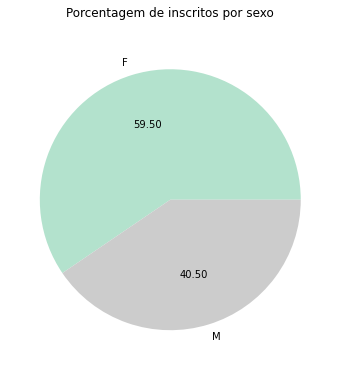

In [ ]:
# Grafico inscritos por sexo
fig, ax = plt.subplots(figsize=(10,6))
enem['TP_SEXO'].value_counts().plot(kind='pie', ax=ax, cmap='Pastel2', autopct='%.2f')
plt.title('Porcentagem de inscritos por sexo', pad=20, fontsize=12, color='black')
sns.despine()
plt.ylabel('')
plt.show()

Continuamos a analisar a amostra segundo a idade do candidato. A partir de 2017, o MEC excluiu a possibilidade de obtenção do diploma de ensino médio pelo ENEM e passou a ter como única função o ingresso no ensino superior. Com isso, o candidato só estará habilitado ao ingresso no ensino superior tendo concluído o ensino médio. Existe uma categoria que indica se o aluno fez a prova como treino. Assim queremos entender como é o público do exame em termos de idade, quem são os "treineiros" e se existe alguma diferença na distribuição das idades por sexo.

In [ ]:
# idade minima e idade maxima
enem['NU_IDADE'].min(), enem['NU_IDADE'].max()

(1, 94)

Um dado interessante é constatar a participação de pessoas dos 13 aos 82 anos prestando o exame e este histograma está condizente com esta realidade. Vale destacar que o ENEM tem uma grande importância para os jovens em torno de 17 e 22 anos que estão buscando a oportunidade do ingresso no ensino superior. Como era de se esperar, os "treineiros" se concentram em torno dos 17 anos e os histogramas de mulheres e homens parecem ter a mesma distribuição.

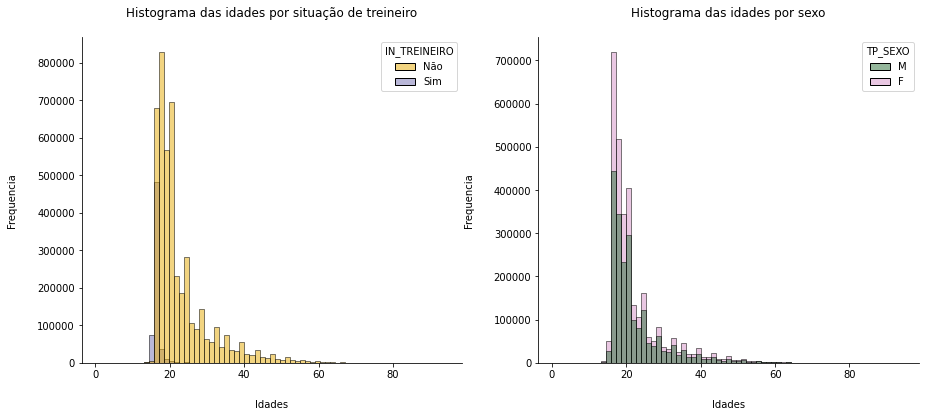

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=enem, x='NU_IDADE', hue='IN_TREINEIRO', bins=69, ax=ax1, palette='Dark2_r')
sns.histplot(data=enem, x='NU_IDADE', hue='TP_SEXO', bins=69, ax=ax2, palette='cubehelix')
sns.despine()
ax1.set_title('Histograma das idades por situação de treineiro', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Idades', labelpad=20)
ax1.set_ylabel('Frequencia', labelpad=20)
ax2.set_title('Histograma das idades por sexo', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idades', labelpad=20)
ax2.set_ylabel('Frequencia', labelpad=20)

plt.show()

Um dado importante a ser avaliado é a distribuição dos inscritos em cada Unidade da Federação. Optou-se por utilizar a razão entre a quantidade de inscritos da UF pela [população estimada da UF em 2020](https://sidra.ibge.gov.br/tabela/6579). Esperava-se que todas as barras do gráfico estivesem próximas, ou seja, que a proporção de inscritos em cada Unidade Federativa fosse aproximadamente a mesma. Contudo, o que se constata é que esse indicador é aleatório não sendo possível tirar quaisquer conclusões.

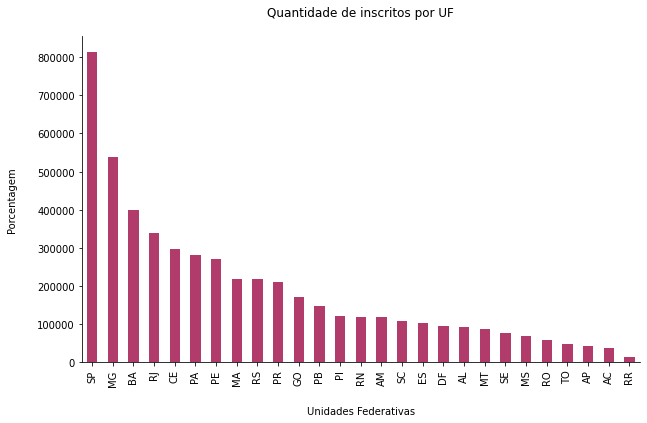

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
enem['SG_UF_RESIDENCIA'].value_counts().plot(kind='bar', color=sns.color_palette('flare')[3])
plt.title('Quantidade de inscritos por UF', pad=20, fontsize=12, color='black')
plt.xlabel('Unidades Federativas', labelpad=20)
plt.ylabel('Porcentagem', labelpad=20)
sns.despine()
plt.show()

Nossa última análise engloba etnia e renda. Com 300 anos de escravidão no Brasil, é um senso comum que ainda hoje as classes mais pobres tenham predominância parda e negra, enquanto as classes altas são dominadas por brancos. Como forma de reparação histórica, foi criado em 2012 a [Lei de cotas](http://www.planalto.gov.br/ccivil_03/_Ato2011-2014/2012/Lei/L12711.htm). O que queremos é averiguar se este senso comum da nossa sociedade também se reflete nos inscritos do Enem.

In [ ]:
# participação de cada raca em cada classe de renda familiar
relacao_renda_raca = enem.groupby('Q006')['TP_COR_RACA'].value_counts(normalize=True).unstack()
relacao_renda_raca.rename(columns={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)

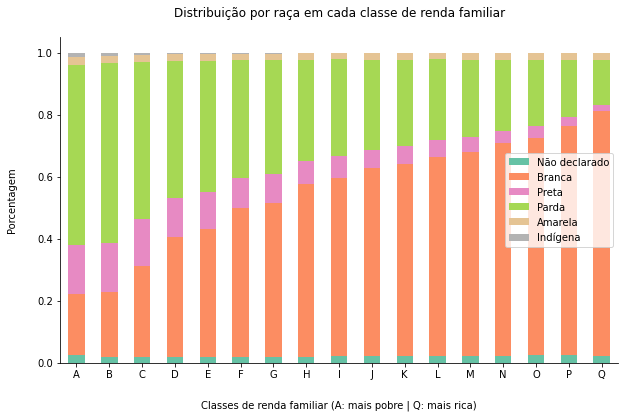

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
relacao_renda_raca.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)
plt.title('Distribuição por raça em cada classe de renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
plt.xticks(label=classes_renda, rotation=0)
plt.ylabel('Porcentagem', labelpad=20)
sns.despine()
plt.legend()
plt.show()

Fica claro pelo gráfico como essas estatísticas são completamente dependentes e correlacionadas haja vista que os estudantes com diferentes cores de pele estão distribuídos diferentemente entre as classes econômicas: nas classes econômicas mais baixas predominam os estudantes pretos e pardos, e conforme a renda familiar aumenta percebe-se um embranquecimento da cor da pele. Portanto, a partir daqui, as análises feitas por renda podem também ser entendidas análogamente como análises por raça.

#6. INSCRITOS FALTOSOS

Como explicado na introdução, o exame é realizado em 2 domingos consecutivos e, portanto, o estudante tem 2 chances de encontrar o portão fechado. A primeira análise realizada partiu da hipótese que se o candidato perde a prova no primeiro dia ele não comparece no segundo dia. 

Esta hipótese foi confirmada constatando que 99.27% dos candidatos ausentes no primeiro dia não compareceram no domingo seguinte. Esta constatação é condizente com o esperado visto que o candidato que zera alguma prova não está apto a se cadastrar no sisu para tentar vaga em alguma universidade pública ou algum programa do governo federal.

Dito isso, considerou-se como candidato faltoso, aquele que não compareceu há pelo menos um domingo. Complementarmente, considerou-se como candidato presente aquele que compareceu aos dois dias do exame.

In [ ]:
# 'TP_PRESENCA_CH' é referente ao primeiro dia e 'TP_PRESENCA_MT' é referente ao segundo dia
enem.groupby('TP_PRESENCA_CH')['TP_PRESENCA_MT'].value_counts(normalize=True).unstack().rename(columns={0:'Falta',1:'Presente',2:'Eliminado'},
                                                                                               index={0:'Falta',1:'Presente',2:'Eliminado'})

TP_PRESENCA_MT,Falta,Presente,Eliminado
TP_PRESENCA_CH,,,
Falta,0.993114,0.006872,0.000014
Presente,0.055885,0.943633,0.000482
Eliminado,0.901277,0.097741,0.000982


A segunda hipótese levantada foi se existia alguma relação entre o não comparecimento do inscrito com o local de aplicação da prova. O inscrito pode ser alocado para um município (ou até mesmo um estado) diferente do qual reside por falta de escolas com estrutura de aplicação. Outro fator que piora o cenário é não possuir carro ou moto na residência, visto que depender do transporte público no Brasil em circunstâncias normais é desgastante para o candidato, logo, ir para outra cidade pode ser um fator para a desistência estudante.

In [ ]:
# Inscritos que não estavam presentes na prova de ciencias humanas (dia 1) ou na prova de matemática (dia 2)
enem_faltosos = enem[(enem['TP_PRESENCA_CH'] == 0) | (enem['TP_PRESENCA_MT'] == 0)]

In [ ]:
enem_faltosos.groupby('MUN_RES_E_MUN_PROVA')['TEM_CARRO_OU_MOTO'].value_counts()

MUN_RES_E_MUN_PROVA  TEM_CARRO_OU_MOTO
Diferente            Não                   221251
                     Sim                    25271
Igual                Não                  1050806
                     Sim                    93640
Name: TEM_CARRO_OU_MOTO, dtype: int64

In [ ]:
# Quantidade por local de prova diferente de onde reside e posse de carro ou moto
tmp = enem_faltosos.groupby('MUN_RES_E_MUN_PROVA')['TEM_CARRO_OU_MOTO'].value_counts()
relacao_municipio_prova_veiculo = [f'{round(tmp[i]*100/tmp.sum(),2)}%' for i in tmp.index]
relacao_municipio_prova_veiculo

['15.91%', '1.82%', '75.54%', '6.73%']

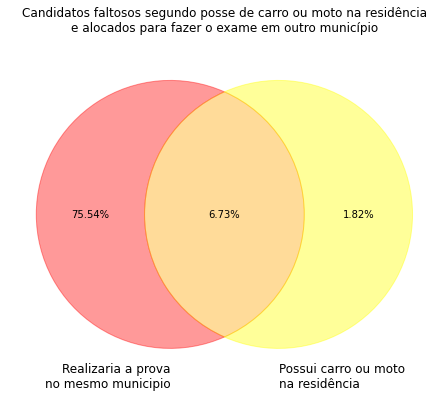

In [ ]:
# Diagrama de Venn para visualizar a relacao acima 
fig, ax = plt.subplots(figsize=(10,6))

v = venn2(subsets = (2,2,2), set_labels = ('Realizaria a prova\nno mesmo municipio', 'Possui carro ou moto\nna residência'), ax=ax)
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('yellow')
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text(relacao_municipio_prova_veiculo[2])
v.get_label_by_id('01').set_text(relacao_municipio_prova_veiculo[1])
v.get_label_by_id('11').set_text(relacao_municipio_prova_veiculo[3])

plt.title('Candidatos faltosos segundo posse de carro ou moto na residência\ne alocados para fazer o exame em outro município', 
          pad=20, fontsize=12, color='black')
plt.show()

O que foi observado é que mais de 90% dos candidatos que faltaram pelo menos um dos dias não tinham carro ou moto para se deslocar, sendo 15% deles alocados para um município diferente daquele em que reside. Aproximadamente 7% dos inscritos faltaram ao exame mesmo possuindo carro ou moto na residência e realizariam o exame no município onde moram.

Vale ressaltar que não é possível saber o motivo concreto da ausência do inscrito, pretende-se apenas mostrar que este fatores combinados podem ter sido decisivos na presença (ou não) ao local da prova.

#7. AS NOTAS DO ENEM

Uma das primeiras notícias a sair no jornal no dia da divulgação das notas, antes mesmo de muitos candidatos conseguirem acessar o site do INEP, é o quantitativo de redações zeradas, o que muitas vezes deixa o candidato ainda mais nervoso. Na amostra em questão, foram 2,562 redações zeradas por anulação, cópia do texto motivador, texto em branco, fuga ao tema, inconsistência do tipo textual, texto insuficiente ou parte desconectada. Além disso, costuma ser divulgado a quantidade de redações perfeitas, isto é, nota máximo (1000). Os "louros" foram apenas para duas estudantes dos estados do Ceará e de Alagoas.

In [ ]:
# Inscritos que estavam presentes na prova de ciencias humanas (dia 1) e na prova de matemática (dia 2)
enem_presentes = enem[(enem['TP_PRESENCA_CH'] == 1) & (enem['TP_PRESENCA_MT'] == 1)]

In [ ]:
# Quantidade por status da redação
enem_presentes['TP_STATUS_REDACAO'].value_counts()

Sem problemas    3596117
Zerada            105891
Name: TP_STATUS_REDACAO, dtype: int64

In [ ]:
len(enem_presentes[enem_presentes['NU_NOTA_REDACAO'] == 1000])

52

In [ ]:
# Subset de inscritos que tiraram nota 1000 an redação
enem_presentes[enem_presentes['NU_NOTA_REDACAO'] == 1000]

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q010,Q011,Q024,Q025,MUN_RES_E_MUN_PROVA,TEM_CARRO_OU_MOTO,TEM_COMPUTADOR_E_INTERNET,NU_NOTA_SOMA
46362,1506807,Santarém,15,PA,22,F,2,Não,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,675.6,673.9,629.7,833.3,DEADBDDAEEAEBEBCBCBCBCBAAEABCADDAAEDABBECCCDC,EEBCDEDBADCEABCBCEABCEEACDBBAECACCCBAADBBAACB,99999DEDBAABBCBCCAAECEDDAAABDCDDBCCCDBDEBAECBD...,AAADBBEEEBEDDBEBACCBCDBACECBBECADCBCADECEDCDA,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,Sem problemas,1000.0,D,E,J,B,A,Sim,Sim,Igual,Não,Sim,2812.5
119417,2211001,Teresina,22,PI,19,F,1,Não,0,0,0,0,0,0,0,0,0,0,0,0,2211001,Teresina,22,PI,1,1,1,1,676.0,703.7,676.1,923.0,ACECAEDEADCBCEEEBCDCBCBEABCABABDEDCAEDCEBDADC,BEECCBABBADCBCEEEBCACACDDDBCCAEBDECBADBABACDB,99999ABCADBCBAADEBBCDAAECDAECEECACCDEBAADDDBBC...,EEEADBEBACCBCDBABECEDACBCBACCEDCDABEDECDDCBAA,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,Sem problemas,1000.0,G,G,P,C,A,Sim,Sim,Igual,Não,Sim,2978.8
127083,2211001,Teresina,22,PI,19,F,1,Não,0,0,0,0,0,0,0,0,0,0,0,0,2211001,Teresina,22,PI,1,1,1,1,636.8,629.5,618.0,786.9,ABEDE*ADEBBDEADEEDAEADCADDCBBBCCCCAEBCDBDCBAA,BEDBABAABAACDCEEEBCACACEEDBEAAABADCBBDBDBACCB,BDABE99999DCDAADABDCAAAECEAEBBDCBCCEEBDABDEABC...,AEDEEEAADBABAECBCDCCCEBECACACCBDECED*DACCACDC,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,Sem problemas,1000.0,G,F,I,D,A,Sim,Sim,Igual,Não,Sim,2671.2
164027,2304400,Fortaleza,23,CE,25,M,3,Não,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,1,1,1,1,578.5,692.0,642.1,685.6,CEBCBECCECCDDADBCACDABCCDCCBCEBCCCCEBBDCDACED,DCBCEEBCABABADCBBACDBBCBACCADCEBADCABEDBBEEDB,EBBAD99999BACDCDEDEBAADDCAECCECDEAADBCDAAECBCC...,EDEEDEAADDDBADCDDDBACEDDDCCCEBABEAEDCAEBCCDDD,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,Sem problemas,1000.0,B,C,E,C,B,Sim,Sim,Igual,Sim,Sim,2598.2
290294,3136702,Juiz de Fora,31,MG,19,F,1,Não,0,0,0,0,0,0,0,0,0,0,0,0,3136702,Juiz de Fora,31,MG,1,1,1,1,768.5,759.8,612.0,839.9,DADCAEABCCCCBEBBEEBACCADDDDADBCBBCECEADEADAAE,EEBCEEDBADBBCBABECABCEBACDBBACBACACBEADBBADCB,ADBBE99999ABCCCCDAAEABDEBACAECADDCCCCBEEBAECBE...,DBEBABCBCDBACECEAEBCBDBCEDCEABEDAABDAEDACABCB,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,Sem problemas,1000.0,G,G,N,B,A,Sim,Sim,Igual,Não,Sim,2980.2
497356,2402006,Caicó,24,RN,18,M,3,Sim,0,0,0,0,0,0,0,0,0,0,0,0,2402006,Caicó,24,RN,1,1,1,1,563.4,590.2,548.7,766.3,AEDDBECCEDACCCBBBCDABCEDAEBBBDAEABADADDDCBCAC,EEBECEECCDBBDBABABAACAAACCBBABCACCBADBCDAAACB,ADBBE99999EBECBCDACECADECAABCCEDEECCDEBDBCEBDA...,CAADDBECEBEBDDEBBCBCCDBACECEDDEAECBCBDBCBDCED,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBE

In [ ]:
redacao_zerada_por_renda = pd.concat([enem_presentes[enem_presentes['TP_STATUS_REDACAO'] == 'Zerada']['Q006'].value_counts().rename('Zeradas'),
                                      enem_presentes['Q006'].value_counts().rename('Total')], axis=1)

In [ ]:
# Porcentagem de redação zerada por renda familiar
redacao_zerada_por_renda['Porcentagem'] = redacao_zerada_por_renda['Zeradas']/redacao_zerada_por_renda['Total']

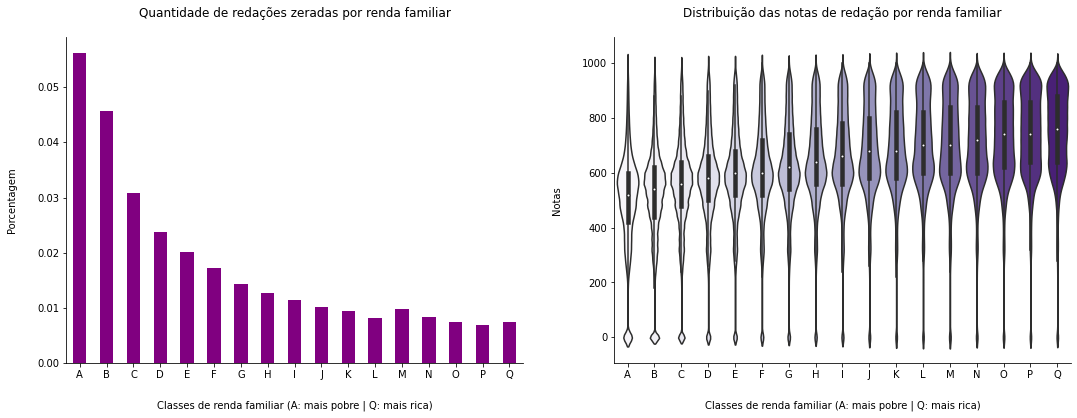

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
redacao_zerada_por_renda['Porcentagem'].sort_index().plot(kind='bar', color='purple', ax=ax1)
ax1.set_title('Quantidade de redações zeradas por renda familiar', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
ax1.set_xticklabels(classes_renda, rotation=0)
ax1.set_ylabel('Porcentagem', labelpad=20)

sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_REDACAO', order=classes_renda, scale='width', palette="Purples", ax=ax2)
ax2.set_title('Distribuição das notas de redação por renda familiar', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)

sns.despine()
plt.show()

Constatamos que, em sendo a redação uma "receita de bolo", os alunos de maior poder aquisitivo são mais preparados tendo, então, a chance de melhores notas. É possível notar pelos gráficos que a maioria das redações zeradas encontram-se nas classes inferiores e que a distribuição das notas se concentra em patamares superiores conforme a renda familiar aumenta, favorecendo a hipótese de que a redação segue um tutorial e o candidato pode se preparar através dos famosos "cursinhos pré vestibular". 



In [ ]:
# estatisticas basicas das 4 areas do conhecimento
notas = enem_presentes[provas]
notas.describe()

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC
count,3.702008e+06,3.702008e+06,3.702008e+06,3.702008e+06
mean,4.778832e+02,5.231851e+02,5.098906e+02,5.223966e+02
std,7.604584e+01,1.090252e+02,8.097884e+01,6.274887e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.178000e+02,4.352000e+02,4.508000e+02,4.855000e+02
50%,4.703000e+02,5.011000e+02,5.134000e+02,5.278000e+02
75%,5.332000e+02,5.979000e+02,5.686000e+02,5.666000e+02
max,8.609000e+02,9.855000e+02,8.351000e+02,8.017000e+02


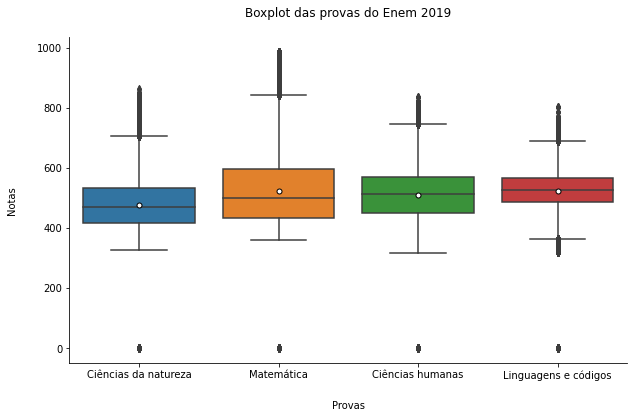

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=notas, palette="tab10", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"5"})
plt.title('Boxplot das provas do Enem 2019', pad=20, fontsize=12, color='black')
plt.xlabel('Provas', labelpad=20)
plt.xticks(ticks=[0,1,2,3], labels=['Ciências da natureza','Matemática','Ciências humanas','Linguagens e códigos'])
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

In [ ]:
# Nota minima diferente de zero em cada prova
for c in notas.columns:
  print(f'A nota mínima diferente de zero em {c} é {notas[notas[c] > 0][c].min()}')

A nota mínima diferente de zero em NU_NOTA_CN é 327.9
A nota mínima diferente de zero em NU_NOTA_MT é 359.0
A nota mínima diferente de zero em NU_NOTA_CH é 315.9
A nota mínima diferente de zero em NU_NOTA_LC é 322.0


Podemos tirar algumas conclusões deste boxplot:
* A nota mínima das provas fica acima dos 300 pontos. A única forma de tirar menos do que isso é zerando a prova;
* As notas de ciências da natureza tem a menor média e a menor mediana - nota que divide a amostra pela metade - indicando ser a área do conhecimento onde os candidatos tem maior dificuldade;
* A nota de matemática é a que tem o maior intervalo entre mínimo e máximo, indicando possivelmente ser a prova onde os candidatos tem a maior chance de se destacarem dos demais;
* A nota de linguagens e códigos tem o menor intervalo interquartil, isto é, 50% das notas dos candidatos estão comprimidas dentro deste intervalo (caixa vermelha), indicando possivelmente - ao contrário da nota de matemática - que é a prova a qual os candidatos são menos destacáveis do todo.

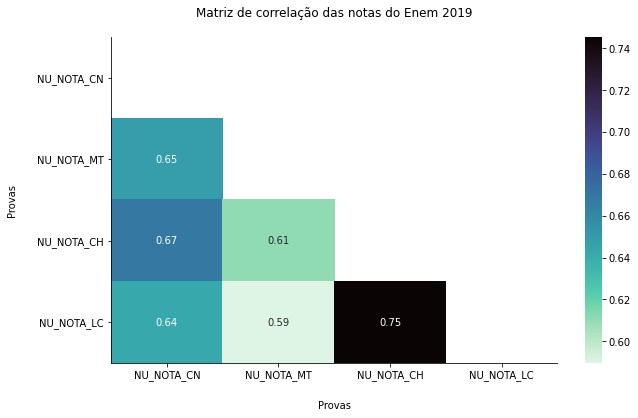

In [ ]:
# Matriz inferior de correlação das notas das 4 areas do conhecimento
fig, ax = plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(notas.corr(), dtype=bool))
sns.heatmap(notas.corr(), cmap="mako_r", annot=True, mask=mask)

plt.title('Matriz de correlação das notas do Enem 2019', pad=20, fontsize=12, color='black')
plt.xlabel('Provas', labelpad=20)
plt.ylabel('Provas', labelpad=20)
plt.yticks(rotation=0)
sns.despine()
plt.show()

Com a matriz de correlação podemos entender como as notas das provas se relacionam. Valores entre 0 e 1 indicam correlação positiva (as duas variáveis crescem/decrescem juntas) enquanto valores entre -1 e 0 indicam correlação negativa (as variáveis crescem/decrescem em oposição). Com as notas do ENEM espera-se encontrar correlações positivas dado que o candidato tende a estudar um pouco de tudo, pois quanto melhor for nas provas melhor o resultado geral. 

Explicado isso, encontramos a melhor correlação entre ciências humanas e liguagens e códigos, isto é, alunos tendem a tirar notas altas ou baixas em ambas as provas simultaneamente. Por outro lado, a correlação entre linguagens e códigos e matemática é mais baixa, indicando que estas notas tem uma relação menos intensa.

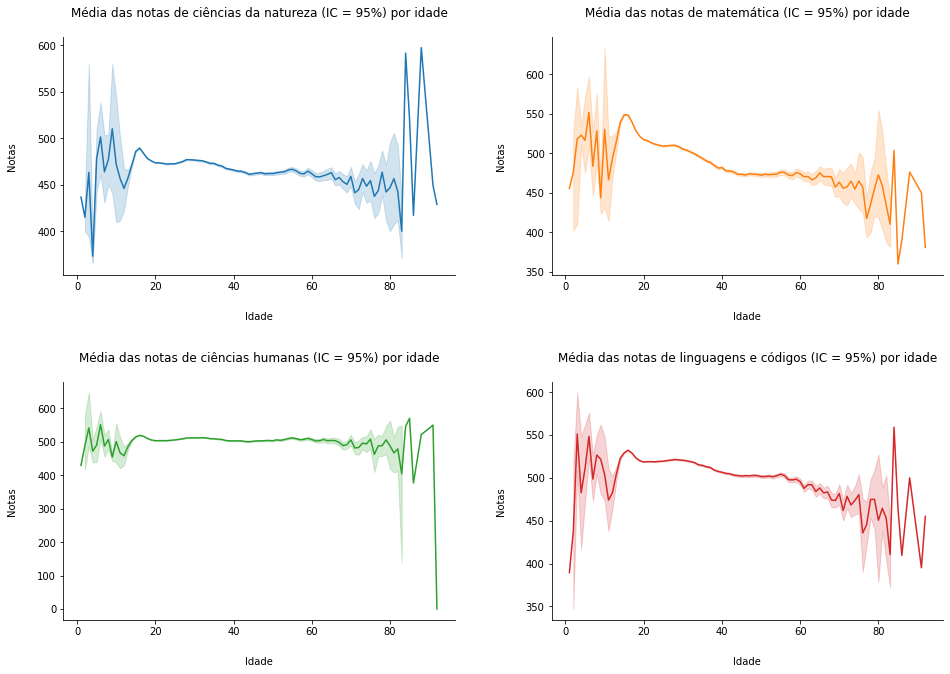

In [ ]:
# Nota por idade
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10))

sns.lineplot(ax=ax1, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_CN', markers=True,dashes=False, color=sns.color_palette("tab10")[0])
sns.lineplot(ax=ax2, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_MT', markers=True,dashes=False, color=sns.color_palette("tab10")[1])
sns.lineplot(ax=ax3, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_CH', markers=True,dashes=False, color=sns.color_palette("tab10")[2])
sns.lineplot(ax=ax4, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_LC', markers=True,dashes=False, color=sns.color_palette("tab10")[3])

ax1.set_title('Média das notas de ciências da natureza (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Idade', labelpad=20)
ax1.set_ylabel('Notas', labelpad=20)
ax2.set_title('Média das notas de matemática (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idade', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)
ax3.set_title('Média das notas de ciências humanas (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Idade', labelpad=20)
ax3.set_ylabel('Notas', labelpad=20)
ax4.set_title('Média das notas de linguagens e códigos (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Idade', labelpad=20)
ax4.set_ylabel('Notas', labelpad=20)

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

Ao observar os gráficos das médias em relação as idades dos candidatos, é possível entender como ela influencia nos resultados de cada prova. Em matemática nota-se que a média decai consideravelmente conforme os anos de afastamento da escola, de tal forma que os melhores resultados estão nas idades teóricas do ensino médio. Na prova de ciências humanas, por outro lado, evidencia-se uma linearidade ao longo de todas as idades. É possível concluir, portanto, que a prova de ciências humanas é menos técnica e mais interpretativa.

Em todas as áreas do conhecimento destaca-se uma maior dispersão das notas dos candidatos com maior idade, isso pode ser explicado pelo treinamento específico para o exame nas escolas e a perda do conteúdo programático com o passar dos anos.

In [ ]:
# Media das notas por nivel de escolaridade paterno
media_por_escolaridade_pai = enem_presentes.groupby('Q001')[provas].mean()
media_por_escolaridade_pai.sort_index(ascending=False, inplace=True)
media_por_escolaridade_pai.rename(index=dicionario_ensino_pais, inplace=True)

In [ ]:
# Media das notas por nivel de escolaridade materno
media_por_escolaridade_mae = enem_presentes.groupby('Q002')[provas].mean()
media_por_escolaridade_mae.sort_index(ascending=False, inplace=True)
media_por_escolaridade_mae.rename(index=dicionario_ensino_pais, inplace=True)

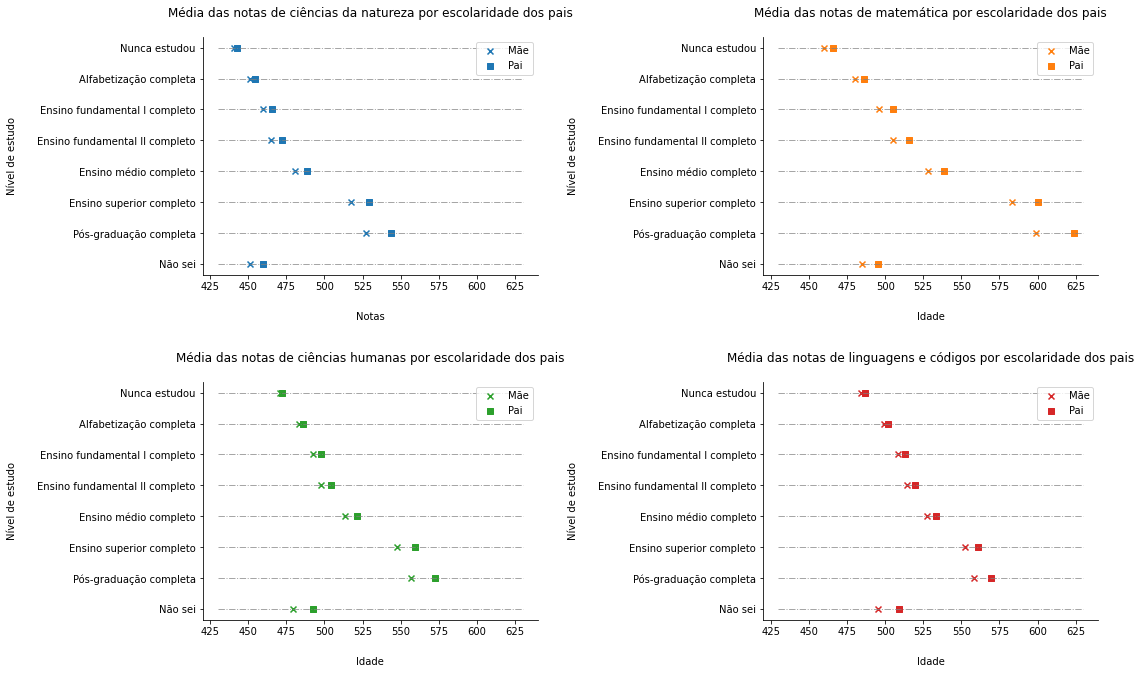

In [ ]:
# Media das notas por nivel de escolaridade dos pais
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,10))
ax1.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax1.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_CN'], marker='x', color=sns.color_palette("tab10")[0], label='Mãe')
ax1.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_CN'], marker='s', color=sns.color_palette("tab10")[0], label='Pai')
ax2.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax2.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_MT'], marker='x', color=sns.color_palette("tab10")[1], label='Mãe')
ax2.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_MT'], marker='s', color=sns.color_palette("tab10")[1], label='Pai')
ax3.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax3.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_CH'], marker='x', color=sns.color_palette("tab10")[2], label='Mãe')
ax3.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_CH'], marker='s', color=sns.color_palette("tab10")[2], label='Pai')
ax4.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax4.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_LC'], marker='x', color=sns.color_palette("tab10")[3], label='Mãe')
ax4.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_LC'], marker='s', color=sns.color_palette("tab10")[3], label='Pai')

ax1.set_title('Média das notas de ciências da natureza por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Notas', labelpad=20)
ax1.set_ylabel('Nível de estudo', labelpad=20)
ax2.set_title('Média das notas de matemática por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idade', labelpad=20)
ax2.set_ylabel('Nível de estudo', labelpad=20)
ax3.set_title('Média das notas de ciências humanas por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Idade', labelpad=20)
ax3.set_ylabel('Nível de estudo', labelpad=20)
ax4.set_title('Média das notas de linguagens e códigos por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Idade', labelpad=20)
ax4.set_ylabel('Nível de estudo', labelpad=20)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

Como já era esperado, a média dos candidatos tende a crescer conforme o nível de escolaridade tanto do pai quanto da mãe, com destaque para a prova de matemática que apresenta uma influência substancialmente maior quando os pais têm ensino superior (ou pós gradução) completo.

Vale ressaltar que ao comparar as médias dos candidatos com o mesmo nível de escolaridade dos pais, observa-se que a média referente a escolaridade do pai se apresenta superior a média referente a escolaridade da mãe. Caberia um estudo mais aprofundado para concluir o motivo de tal resultado.

In [ ]:
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/vinismachadoo/alura-imersao-dados-2/main/uf_brasil.geojson')

In [ ]:
mapa_brasil['codigo_ibg'] = mapa_brasil['codigo_ibg'].astype('int')

In [ ]:
# Media por estado em cada area do conhecimento
media_natureza_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_CN'].mean()], axis=1)
media_matematica_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_MT'].mean()], axis=1)
media_humanas_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_CH'].mean()], axis=1)
media_linguagens_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_LC'].mean()], axis=1)

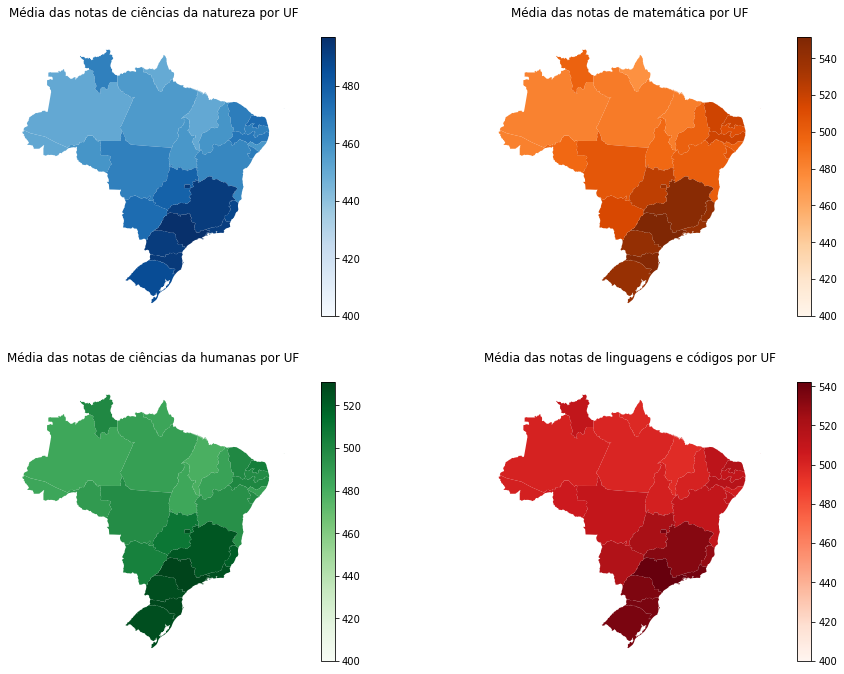

In [ ]:
# Media por UF
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10))
media_natureza_por_estado.plot(ax=ax1, column='NU_NOTA_CN', cmap='Blues', legend=True, vmin=400)
media_matematica_por_estado.plot(ax=ax2, column='NU_NOTA_MT', cmap='Oranges', legend=True, vmin=400)
media_humanas_por_estado.plot(ax=ax3, column='NU_NOTA_CH', cmap='Greens', legend=True, vmin=400)
media_linguagens_por_estado.plot(ax=ax4, column='NU_NOTA_LC', cmap='Reds', legend=True, vmin=400)

ax1.set_title('Média das notas de ciências da natureza por UF', pad=20, fontsize=12, color='black')
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_title('Média das notas de matemática por UF', pad=20, fontsize=12, color='black')
ax2.set_yticks([])
ax2.set_xticks([])
ax3.set_title('Média das notas de ciências da humanas por UF', pad=20, fontsize=12, color='black')
ax3.set_yticks([])
ax3.set_xticks([])
ax4.set_title('Média das notas de linguagens e códigos por UF', pad=20, fontsize=12, color='black')
ax4.set_yticks([])
ax4.set_xticks([])

sns.despine(bottom=True, left=True)
fig.tight_layout(pad=3.0)
plt.show()

As regiões Sul e Sudeste e o DF apresentam melhores desempenho nas 4 áreas do conhecimento, em torno de 80 pontos. O estado de Roraima destaca-se por ter resultado superior aos demais estados da região Norte, assim como o estado de Goiás na região Centro-Oeste. Por outro lado, o estado do Maranhão destaca-se por apresentar média inferior aos outros estados da região Nordeste.


#8. CANDIDATOS COM CONDIÇÃO ESPECIAL

Para a nossa legislação, a [Lei Brasileira de Inclusão da Pessoa com Deficiência](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm#:~:text=Art.%202%C2%BA%20Considera%2Dse%20pessoa,condi%C3%A7%C3%B5es%20com%20as%20demais%20pessoas.) considera pessoa com deficiência "aquela que tem impedimento de longo prazo de natureza física, mental, intelectual ou sensorial, o qual, em interação com uma ou mais barreiras, pode obstruir sua participação plena e efetiva na sociedade em igualdade de condições com as demais pessoas".

A hipótese a ser discutida é se o candidato com deficiência tem condições de participar da competição em pé de igualdade, tanto com candidatos sem necessidades especiais, como com outros candidatos deficientes. Isto porque apenas em 2016 foi aprovada a alteração na [Lei de cotas](http://www.planalto.gov.br/ccivil_03/_Ato2011-2014/2012/Lei/L12711.htm) que inclui cota para deficientes nas universidades públicas, o que mesmo assim, não inclui os programas como Fies e ProUni para universidades particulares.


In [ ]:
# Exemplo média de candidatos com surdez
enem_presentes[enem_presentes['IN_SURDEZ']==1]['NU_NOTA_SOMA'].mean()

1710.0829554995805

In [ ]:
# Exemplo média de candidatos com dislexia
enem_presentes[enem_presentes['IN_DISLEXIA']==1]['NU_NOTA_SOMA'].mean()

2064.941420118346

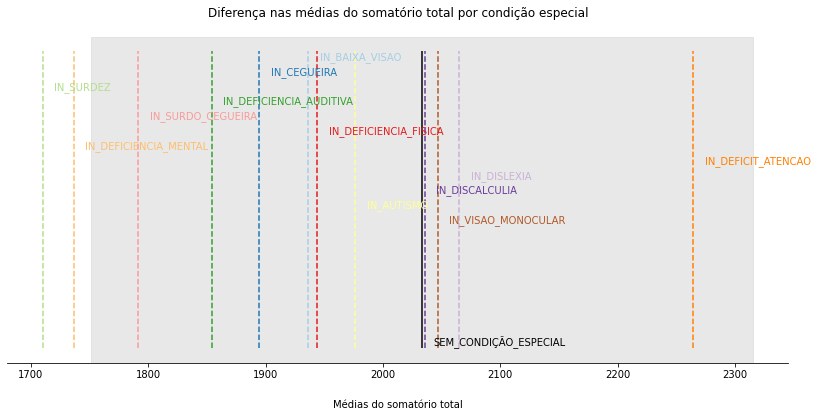

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

pessoas_sem_deficiencia = enem_presentes
for i, at in enumerate(atendimentos_especiais):
  media = enem_presentes[enem_presentes[at]==1]['NU_NOTA_SOMA'].mean()
  ax.vlines(x=media, ymin=0, ymax=100, color=sns.color_palette('Paired')[i], linestyle='--')
  ax.text(media+10,100-5*i,at, color=sns.color_palette('Paired')[i], va='top', ha='left')
  pessoas_sem_deficiencia = pessoas_sem_deficiencia[~pessoas_sem_deficiencia[at].isin([1])]

ax.vlines(x=pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean(), ymin=0, ymax=100, color='black')
ax.text(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+10,0,'SEM_CONDIÇÃO_ESPECIAL', color='black', va='bottom', ha='left')
ax.axvspan(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()-pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           alpha=0.5, color='lightgray')

plt.title('Diferença nas médias do somatório total por condição especial', pad=20, fontsize=12, color='black')
plt.xlabel('Médias do somatório total', labelpad=20)
plt.yticks([])
sns.despine(left=True)
plt.show()

A zona sobreada corresponde a um desvio padrão - cerca de 70% das observações - da média de candidatos sem condição especial. Com isso, podemos entender se o atendimento especializado oferecido pelo MEC é inclusivo e se ele coloca os candidatos com alguma necessidade especial em igualdade com os demais.

Ao que parece, a maioria encontra-se dentro da zona sombreada, o que é um bom resultado. O destaque vai para os candidatos com deficiência mental e surdos (cegos ou não), que tiveram resultado abaixo deste patamar, e para os candidatos com defict de atenção, que apresentaram resultado superior. Aqui apenas validamos o bom resultado do atendimento especializado para a prestação do exame e pode-se levantar a seguinte questão:
* Como podemos melhorar o exame para aqueles com deficiência mental e surdez, para que, apesar de suas desigualdades, possam realizar o exame em igualdade de condições?

#9. A TEORIA DA RESPOSTA AO ÍTEM

Segundo o [Ministério da Educação](http://inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/teoria-de-resposta-ao-item-avalia-habilidade-e-minimiza-o-chute-/21206#:~:text=A%20teoria%20da%20resposta%20ao,total%20de%20acertos%20no%20teste.&text=O%20desempenho%20em%20um%20teste,caracter%C3%ADsticas%20das%20quest%C3%B5es%20(itens)), a nota das áreas do ENEM segue a A teoria da resposta ao item (TRI), uma metodologia de avaliação que não contabiliza apenas o número total de acertos no teste. De acordo com o método, o item é a unidade básica de análise, mas o desempenho em um teste pode ser explicado pela habilidade do avaliado e pelas características das questões.

A TIR qualifica o item de acordo com três parâmetros:

* Poder de discriminação
* Grau de dificuldade
* Possibilidade de acerto ao acaso (chute)

e permite estimar a habilidade de um candidato avaliado e de garantir que essas habilidades, medidas a partir de um conjunto de itens, sejam comparadas com outro conjunto na mesma escala, ainda que eles não sejam os mesmos e que haja quantidades diferentes de itens usados para o cálculo. Dessa forma acertar 40 itens em uma área não significa, necessariamente, ter uma proficiência maior do que em outra área, cujo número de acertos tenha sido 35. Além disso, acertar 40 itens em uma área não significa, necessariamente, ter uma proficiência igual a outro candidato, que também tenha acertado 40 itens.

Logo, é interessante entender como essa metodologia afeta a nota do aluno, por exemplo, o quanto uma questão correta altera a nota final em cada uma das 4 diferentes áreas do conhecimento. A hipótese gira em torno da ideia de que talvez possamos estabelecer um piso para o número de questões em que o aluno se diferencia da maioria.

In [ ]:
# Criando 4 colunas com a quantidade de questões corretas em cada prova
enem_presentes['ACERTOS_CN'] = 0
enem_presentes['ACERTOS_CH'] = 0
enem_presentes['ACERTOS_LC'] = 0
enem_presentes['ACERTOS_MT'] = 0
for i in tqdm(enem_presentes.index):
  enem_presentes['ACERTOS_CN'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_CN'][i], enem_presentes['TX_RESPOSTAS_CN'][i]))
  enem_presentes['ACERTOS_CH'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_CH'][i], enem_presentes['TX_RESPOSTAS_CH'][i]))
  enem_presentes['ACERTOS_LC'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_LC'][i], enem_presentes['TX_RESPOSTAS_LC'][i]))
  enem_presentes['ACERTOS_MT'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_MT'][i], enem_presentes['TX_RESPOSTAS_MT'][i]))

100%|██████████| 3702008/3702008 [39:09<00:00, 1575.38it/s]


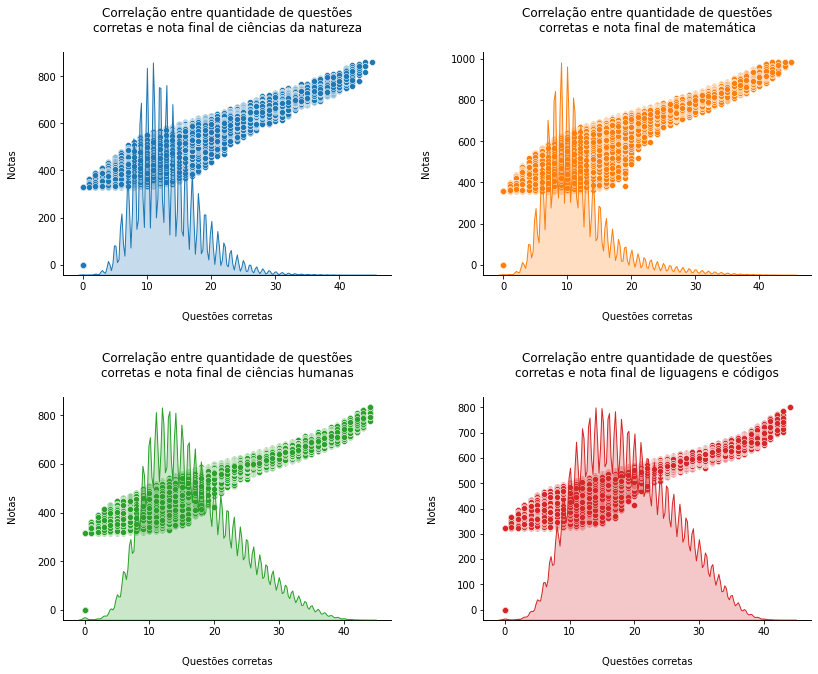

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot('ACERTOS_CN', 'NU_NOTA_CN', data=enem_presentes, ax=ax1, color=sns.color_palette('tab10')[0])
sns.scatterplot('ACERTOS_MT', 'NU_NOTA_MT', data=enem_presentes, ax=ax2, color=sns.color_palette('tab10')[1])
sns.scatterplot('ACERTOS_CH', 'NU_NOTA_CH', data=enem_presentes, ax=ax3, color=sns.color_palette('tab10')[2])
sns.scatterplot('ACERTOS_LC', 'NU_NOTA_LC', data=enem_presentes, ax=ax4, color=sns.color_palette('tab10')[3])

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()
sns.kdeplot(enem_presentes['ACERTOS_CN'], shade=True, ax=ax5, color=sns.color_palette('tab10')[0])
sns.kdeplot(enem_presentes['ACERTOS_MT'], shade=True, ax=ax6, color=sns.color_palette('tab10')[1])
sns.kdeplot(enem_presentes['ACERTOS_CH'], shade=True, ax=ax7, color=sns.color_palette('tab10')[2])
sns.kdeplot(enem_presentes['ACERTOS_LC'], shade=True, ax=ax8, color=sns.color_palette('tab10')[3])

ax1.set_title('Correlação entre quantidade de questões\ncorretas e nota final de ciências da natureza', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Questões corretas', labelpad=20)
ax1.set_ylabel('Notas', labelpad=20)
ax2.set_title('Correlação entre quantidade de questões\ncorretas e nota final de matemática', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Questões corretas', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)
ax3.set_title('Correlação entre quantidade de questões\ncorretas e nota final de ciências humanas', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Questões corretas', labelpad=20)
ax3.set_ylabel('Notas', labelpad=20)
ax4.set_title('Correlação entre quantidade de questões\ncorretas e nota final de liguagens e códigos', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Questões corretas', labelpad=20)
ax4.set_ylabel('Notas', labelpad=20)

ax5.set_yticks([])
ax5.set_ylabel('')
ax6.set_yticks([])
ax6.set_ylabel('')
ax7.set_yticks([])
ax7.set_ylabel('')
ax8.set_yticks([])
ax8.set_ylabel('')

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

Com esta visualização podemos notar que a partir de 20 acertos, começa a ter uma correlação linear positiva entre a quantidade de acertos e a nota final, ou seja, uma questão correta a mais aumenta o seu resultado. Entre 10 e 20 questões corretas (onde a maioria dos candidatos se encontra) as notas variam sem padrão algum, com candidatos possivelmente tirando notas superiores apesar do número de questões marcadas corretamente.

#10. POR DENTRO DA PANDEMIA E PERSPECTIVAS PARA O EXAME ONLINE

Para o historiador Leandro Karnal, em entrevista ao [Estado](https://saude.estadao.com.br/noticias/geral,classes-media-e-alta-enfrentam-o-tedio-ja-as-classes-baixas-enfrentam-fome-diz-leandro-karnal,70003302191), "a epidemia revela de forma quase violenta a desigualdade. Classes média e alta enfrentam o tédio, classes baixas enfrentam a fome". É nesse sentido que levantou-se a discussão no começo deste ano sobre a aplicação do próximo exame. Algumas indagações diziam respeito a: 

* Quem é o aluno que irá conseguir estudar?
* Caso o exame seja online, quem será capaz de prestar?
* Estaremos aumentando ou preservando o abismo social evidente entre estudantes de diferentes classes e cores da pele?

In [ ]:
enem.groupby('Q024')['Q025'].value_counts()

Q024  Q025
Não   Sim     1345302
      Não     1000165
Sim   Sim     2609503
      Não      140300
Name: Q025, dtype: int64

In [ ]:
# Quantidade de inscritos por posse de computador e internet
tmp = enem.groupby('Q024')['Q025'].value_counts()
relacao_internet_computador = [f'{round(tmp[i]*100/tmp.sum(),2)}%' for i in tmp.index]
relacao_internet_computador

['26.4%', '19.63%', '51.21%', '2.75%']

No contexto da pandemia é fácil entender qual aluno está sendo capaz de se preparar para o próximo exame, seja ele presencial ou online. Segundo o jornal [Folha de São Paulo](https://www1.folha.uol.com.br/educacao/2020/03/fechamento-generalizado-de-escolas-impoe-desafio-inedito-a-educacao.shtml), enquanto escolas particulares rapidamente se adaptaram ao novo modelo de ensino a distância transmitindo aulas ao vivo por computador ou plataformas online, escolas da rede pública de ensino ainda não sabem como será o uso de tecnologia durante o ano letivo.

O problema está no acesso a recursos para estudar online: 46% dos candidatos não tem computador em casa - o número é ainda mais assustador entre pessoas autodeclaradas pretas, pardas e indígenas, ultrapassando os 50%. Ademais, 3% dos candidatos apesar de possuir computador, dizem não ter acesso a internet, de forma que estaria sendo negada à 49% dos inscritos a oportunidade de estudar adequadamente e competir de forma justa.

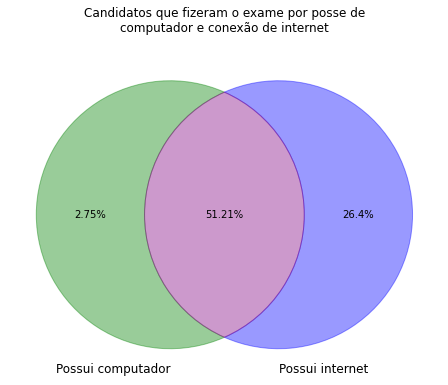

In [ ]:
# Diagrama de Venn para visualizar a relacao acima 
fig, ax = plt.subplots(figsize=(10,6))

v = venn2(subsets = (2,2,2), set_labels = ('Possui computador', 'Possui internet'), ax=ax)
v.get_patch_by_id('10').set_color('green')
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('11').set_color('purple')
v.get_label_by_id('10').set_text(relacao_internet_computador[3])
v.get_label_by_id('01').set_text(relacao_internet_computador[0])
v.get_label_by_id('11').set_text(relacao_internet_computador[2])

plt.title('Candidatos que fizeram o exame por posse de\ncomputador e conexão de internet', 
          pad=20, fontsize=12, color='black')
plt.show()

In [ ]:
computador_internet_raca = enem.groupby('TP_COR_RACA')['TEM_COMPUTADOR_E_INTERNET'].value_counts(normalize=True).unstack()
computador_internet_raca.rename(index={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)
computador_internet_raca

TEM_COMPUTADOR_E_INTERNET,Não,Sim
TP_COR_RACA,,
Não declarado,0.477544,0.522456
Branca,0.334500,0.665500
Preta,0.584673,0.415327
Parda,0.576378,0.423622
Amarela,0.514196,0.485804
Indígena,0.704749,0.295251


#11. REFERÊNCIAS BIBLIOGRÁFICAS

Alura. **Imersão Dados Alura Aula 1: Sua primeira análise em dados da Educação**.
Disponível em [link](https://www.alura.com.br/imersao-dados/aula01-educacao-no-brasil)

Alura. **Imersão Dados Alura Aula 2: Análise exploratória de dados**. Disponível em [link](https://www.alura.com.br/imersao-dados/aula02-analises-exploratoria)

Alura. **Imersão Dados Alura Aula 3: Distribuições e correlações entre notas**. Dispoível em [link](https://www.alura.com.br/imersao-dados/aula03-distribuicoes-ciencia-de-dados) 

Angela Pinho. **Fechamento generalizado de escolas impõe desafio inédito à educação**. [link](https://www1.folha.uol.com.br/educacao/2020/03/fechamento-generalizado-de-escolas-impoe-desafio-inedito-a-educacao.shtml)

Eduardo Peret. **Mulher estuda mais, trabalha mais e ganha menos do que o homem**. Disponível em [link](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/20234-mulher-estuda-mais-trabalha-mais-e-ganha-menos-do-que-o-homem#:~:text=Mulher%20estuda%20mais%2C%20trabalha%20mais%20e%20ganha%20menos%20do%20que%20o%20homem,-Editoria%3A%20Estat%C3%ADsticas%20Sociais&text=Mesmo%20assim%2C%20e%20ainda%20contando,G%C3%AAnero%2C%20divulgado%20hoje%20pelo%20IBGE)

Géssica Santos. **Como pegar o certificado do ensino médio pelo Enem?**. Disponível em [link](https://www.educamaisbrasil.com.br/educacao/enem/como-pegar-o-certificado-do-ensino-medio-pelo-enem)

IBGE. **Distribuição percentual da População por Sexo - Brasil - 1980 a 2010**. Disponível em [link](https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html)

IBGE, SIDRA. **Tabela 6579 - População residente estimada**. Disponível em [link](https://sidra.ibge.gov.br/tabela/6579)

INEP. **Teoria de resposta ao item avalia habilidade e minimiza o “chute”**. 
Disponível em [link](http://inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/teoria-de-resposta-ao-item-avalia-habilidade-e-minimiza-o-chute-/21206#:~:text=A%20teoria%20da%20resposta%20ao,total%20de%20acertos%20no%20teste.&text=O%20desempenho%20em%20um%20teste,caracter%C3%ADsticas%20das%20quest%C3%B5es%20(itens))

Presidência da República. **LEI Nº 12.711, DE 29 DE AGOSTO DE 2012**. Disponível em [link](http://www.planalto.gov.br/ccivil_03/_Ato2011-2014/2012/Lei/L12711.htm)

Presidência da República. **LEI Nº 13.146, DE 6 DE JULHO DE 2015**. Disponível em [link](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm#:~:text=Art.%202%C2%BA%20Considera%2Dse%20pessoa,condi%C3%A7%C3%B5es%20com%20as%20demais%20pessoas.)

Priscilla Mengue. **Leandro Karnal: 'Classes media e alta enfrentam tédio, classes baixas enfrentam fome'**. [link](https://saude.estadao.com.br/noticias/geral,classes-media-e-alta-enfrentam-o-tedio-ja-as-classes-baixas-enfrentam-fome-diz-leandro-karnal,70003302191)

Selva Prabhakaran. **Top 50 matplotlib Visualizations – The Master Plots**. Disponível em [link](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)